In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import yfinance as yf
import datetime as dt
start=dt.datetime(2000,1,1)
end=dt.datetime(2025,2,2)
stock="AAPL"
df=yf.download(stock,start,end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-01-27,229.306854,231.591337,223.440999,223.480912,94863400
2025-01-28,237.686630,239.611994,230.254561,230.294474,75707600
2025-01-29,238.783981,239.282778,233.446850,233.556586,45486100
2025-01-30,237.018234,240.210530,236.639159,238.095637,55658300
2025-01-31,235.432083,246.595158,232.878246,246.595158,101075100


In [4]:
df.shape

(6309, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6309 entries, 2000-01-03 to 2025-01-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   6309 non-null   float64
 1   (High, AAPL)    6309 non-null   float64
 2   (Low, AAPL)     6309 non-null   float64
 3   (Open, AAPL)    6309 non-null   float64
 4   (Volume, AAPL)  6309 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 295.7 KB


In [6]:
df.isnull().sum()

,,0
Price,Ticker,
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,6309.000000,6309.000000,6309.000000,6309.000000,6.309000e+03
mean,41.804736,42.217211,41.350751,41.773201,3.848874e+08
std,60.962680,61.540855,60.312818,60.903277,3.835650e+08
min,0.197156,0.198208,0.191145,0.195202,2.323470e+07
25%,2.019942,2.048794,1.988085,2.020242,1.144594e+08
50%,13.898459,14.040186,13.795486,13.921025,2.664900e+08
75%,44.506962,44.814937,44.182891,44.471466,5.167288e+08
max,258.396667,259.474086,257.010028,257.568678,7.421641e+09


In [9]:
df=df.reset_index()

In [10]:
df.shape

(6309, 6)

In [11]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2000-01-03,0.841048,0.845274,0.764034,0.787983,535796800
1,2000-01-04,0.770139,0.831186,0.760277,0.813342,512377600
2,2000-01-05,0.781409,0.830716,0.773895,0.779530,778321600
3,2000-01-06,0.713787,0.803949,0.713787,0.797375,767972800
4,2000-01-07,0.747598,0.758869,0.717544,0.725057,460734400


In [12]:
df.columns

MultiIndex([(  'Date',     ''),
            ( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [13]:
df.to_csv("powergrid.csv")

In [14]:
data01=pd.read_csv('powergrid.csv',index_col="Price")

In [15]:
data01.head()

,Date,Close,High,Low,Open,Volume
Price,,,,,,
Ticker,NaN,AAPL,AAPL,AAPL,AAPL,AAPL
0,2000-01-03,0.8410475850105286,0.8452737254172048,0.7640336296269649,0.787983229909197,535796800
1,2000-01-04,0.7701389789581299,0.8311859925057475,0.7602772473897574,0.8133416112650513,512377600
2,2000-01-05,0.7814085483551025,0.8307164032557635,0.7738954811251461,0.7795302690080285,778321600
3,2000-01-06,0.7137866616249084,0.8039493784334993,0.7137866616249084,0.7973754264275039,767972800


In [16]:
data01=data01.iloc[1:,:]

In [17]:
data01.head()

,Date,Close,High,Low,Open,Volume
Price,,,,,,
0,2000-01-03,0.8410475850105286,0.8452737254172048,0.7640336296269649,0.787983229909197,535796800
1,2000-01-04,0.7701389789581299,0.8311859925057475,0.7602772473897574,0.8133416112650513,512377600
2,2000-01-05,0.7814085483551025,0.8307164032557635,0.7738954811251461,0.7795302690080285,778321600
3,2000-01-06,0.7137866616249084,0.8039493784334993,0.7137866616249084,0.7973754264275039,767972800
4,2000-01-07,0.7475982308387756,0.7588687119469941,0.717544300047654,0.7250573689390404,460734400


In [18]:
#candlesticks
import plotly.graph_objects as go
fig=go.Figure(data=[go.Candlestick(x=data01['Date'],open=data01['Open'],high=data01['High'],low=data01['Low'],close=data01['Close'])])
fig.update_layout(title='AAPL',xaxis_rangeslider_visible=False)
fig.show()

In [19]:
df=df.drop(['Date'],axis=1)

<ipython-input-19-fb90ff82c320>:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [20]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,0.841048,0.845274,0.764034,0.787983,535796800
1,0.770139,0.831186,0.760277,0.813342,512377600
2,0.781409,0.830716,0.773895,0.779530,778321600
3,0.713787,0.803949,0.713787,0.797375,767972800
4,0.747598,0.758869,0.717544,0.725057,460734400


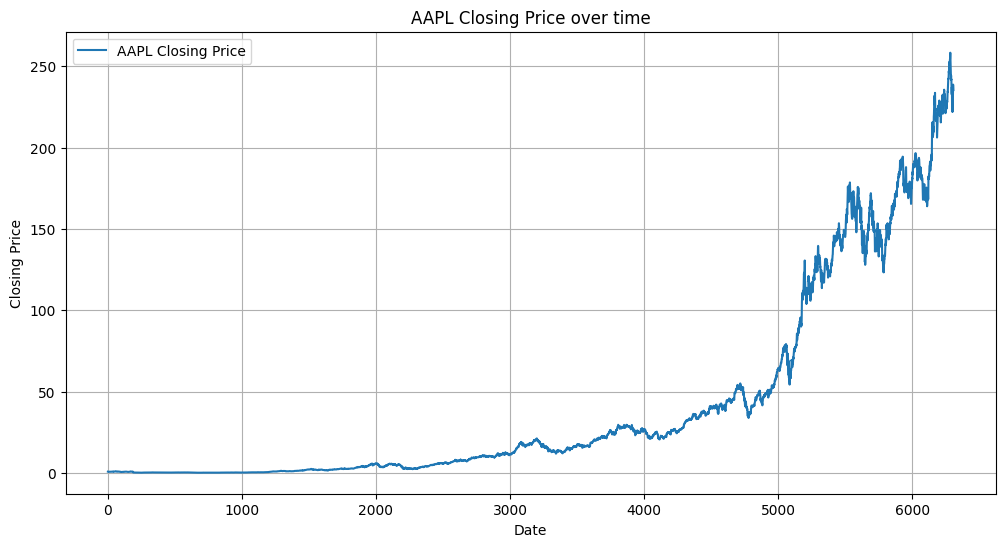

In [21]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'],label=f"{stock} Closing Price")
plt.title(f"{stock} Closing Price over time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.grid()
plt.legend()
plt.show()

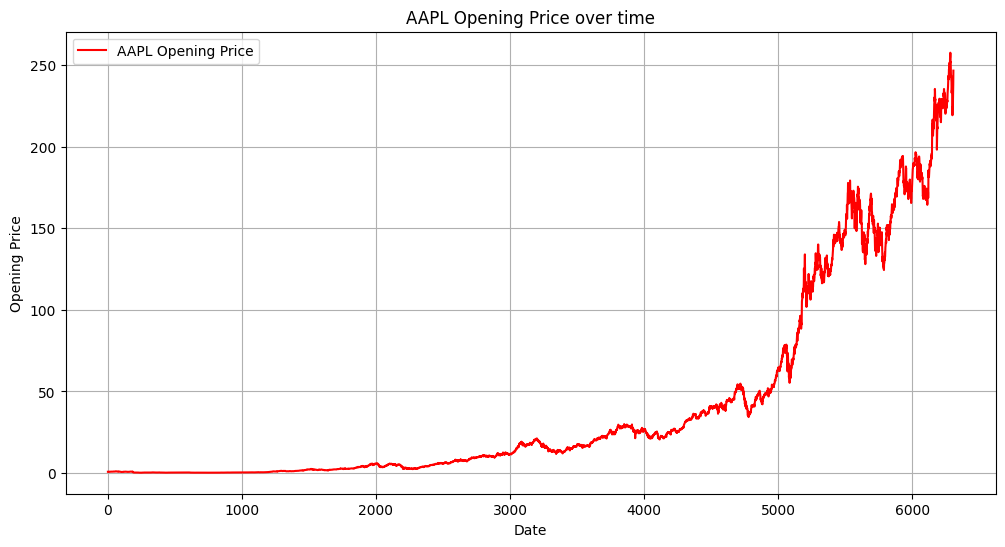

In [22]:
plt.figure(figsize=(12,6))
plt.plot(df['Open'],label=f"{stock} Opening Price",color="red")
plt.title(f"{stock} Opening Price over time")
plt.xlabel("Date")
plt.ylabel("Opening Price")
plt.grid()
plt.legend()
plt.show()

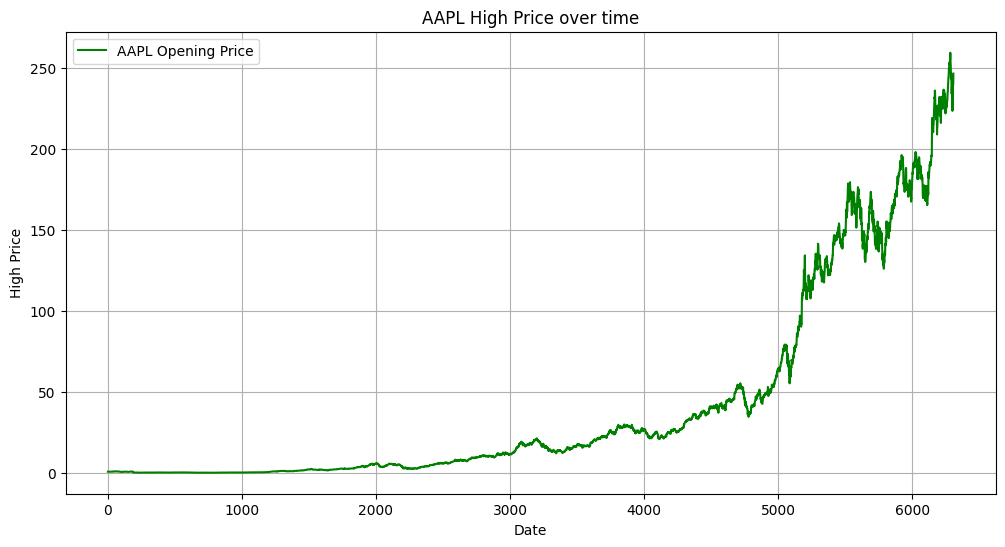

In [23]:
plt.figure(figsize=(12,6))
plt.plot(df['High'],label=f"{stock} Opening Price",color="green")
plt.title(f"{stock} High Price over time")
plt.xlabel("Date")
plt.ylabel("High Price")
plt.grid()
plt.legend()
plt.show()

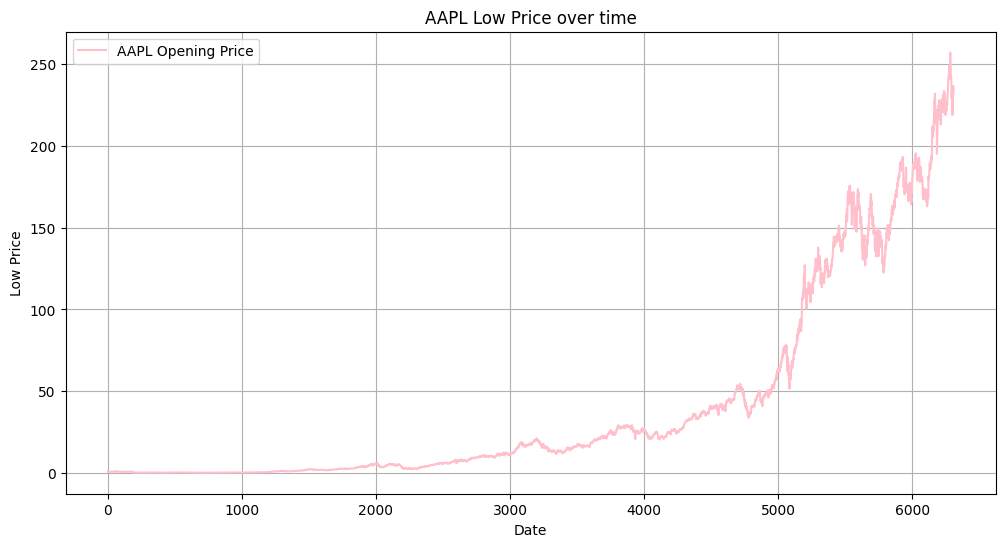

In [24]:
plt.figure(figsize=(12,6))
plt.plot(df['Low'],label=f"{stock} Opening Price",color="pink")
plt.title(f"{stock} Low Price over time")
plt.xlabel("Date")
plt.ylabel("Low Price")
plt.grid()
plt.legend()
plt.show()

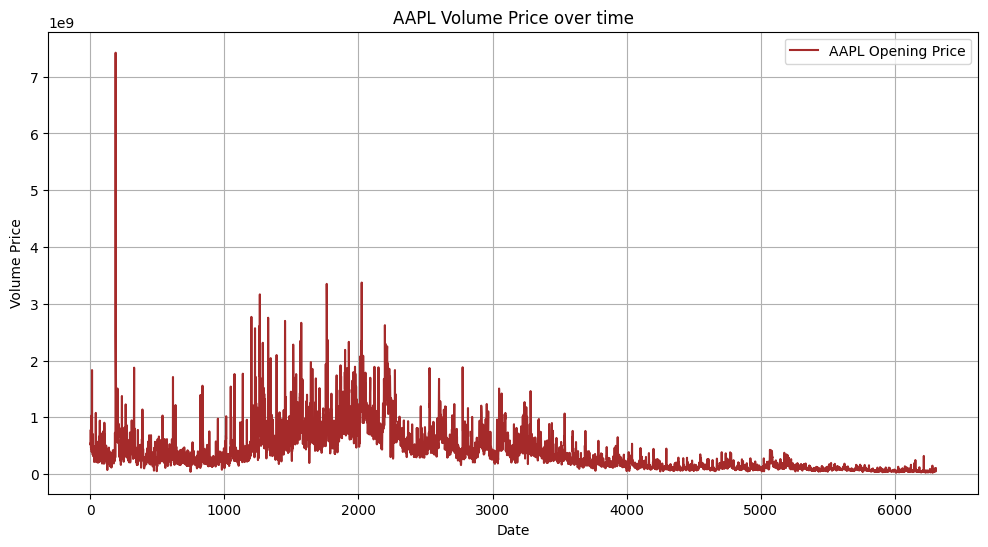

In [25]:
plt.figure(figsize=(12,6))
plt.plot(df['Volume'],label=f"{stock} Opening Price",color="brown")
plt.title(f"{stock} Volume Price over time")
plt.xlabel("Date")
plt.ylabel("Volume Price")
plt.grid()
plt.legend()
plt.show()

In [26]:
#Moving Average simple
ma50=df.Close.rolling(50).mean()
ma100=df.Close.rolling(100).mean()

In [27]:
ma50

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
6304,238.679439
6305,238.959364
6306,239.243479
6307,239.430428


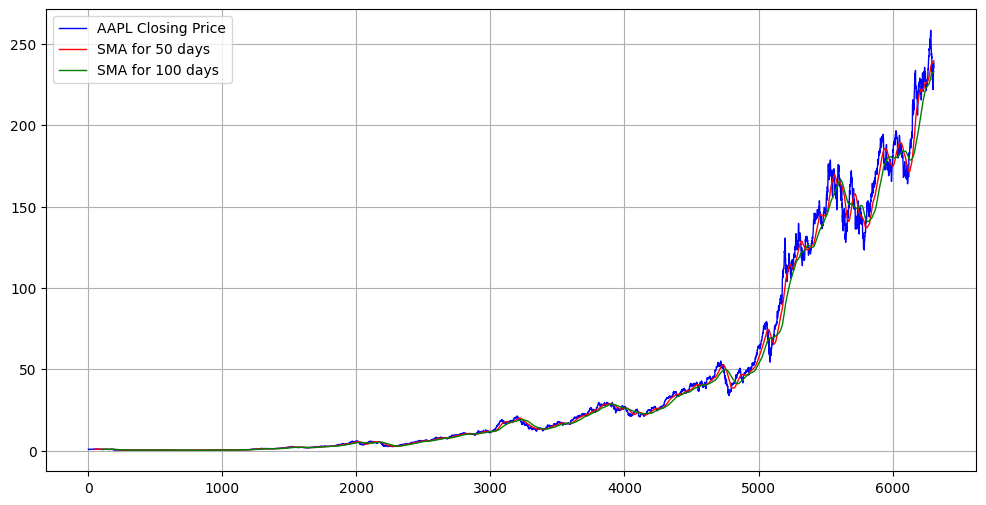

In [28]:
# fig,ax=plt.subplots(1,2,figsize=(12,6))

# ax[0].plot(ma50,label="ma for 50 days",color="red")
# ax[1].plot(ma100,label="ma for 100 days",color="green")
# plt.show()

plt.figure(figsize=(12,6))
plt.plot(df['Close'],label="AAPL Closing Price",color="blue",linewidth=1)
plt.plot(ma50,label="SMA for 50 days",color="red",linewidth=1)
plt.plot(ma100,label="SMA for 100 days",color="green",linewidth=1)
plt.grid()
plt.legend()
plt.show()

In [29]:
#exponential moving average
ema50=df.Close.ewm(span=50,adjust=False).mean()
ema100=df.Close.ewm(span=100,adjust=False).mean()

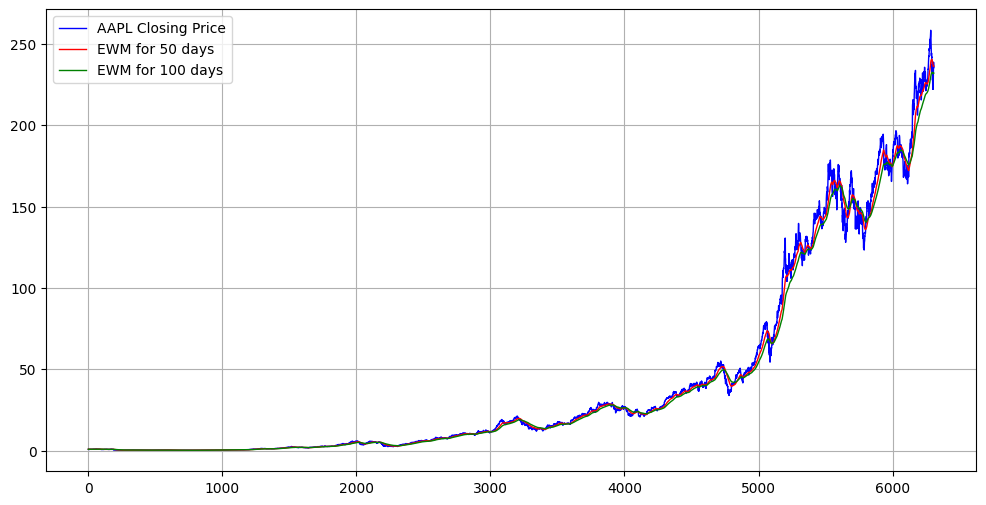

In [30]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'],label="AAPL Closing Price",color="blue",linewidth=1)
plt.plot(ema50,label="EWM for 50 days",color="red",linewidth=1)
plt.plot(ema100,label="EWM for 100 days",color="green",linewidth=1)
plt.grid()
plt.legend()
plt.show()

In [31]:
#Training and Testing
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [32]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler(feature_range=(0,1))
training_data=mms.fit_transform(data_training)
testing_data=mms.transform(data_testing)

In [33]:
training_data

array([[0.01780519],
       [0.01584439],
       [0.01615603],
       ...,
       [0.96727948],
       [0.9628995 ],
       [0.96244855]])

In [34]:
x_train=[]
y_train=[]
for i in range(100,training_data.shape[0]):
    x_train.append(training_data[i-100:i])
    y_train.append(training_data[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)

In [35]:
x_train.shape

(4316, 100, 1)

In [36]:
y_train.shape

(4316,)

In [37]:
#Model Building
import tensorflow.keras
from keras.layers import Dropout,LSTM,Dense
from keras.models import Sequential

In [38]:
model=Sequential()
model.add(LSTM(units=50,activation="relu",return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation="relu",return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation="relu",return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(optimizer="adam",loss="mean_squared_error",metrics=['accuracy'])
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 24s 84ms/step - accuracy: 2.2766e-04 - loss: 0.0345
Epoch 2/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 4.4716e-04 - loss: 0.0040
Epoch 3/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 2.1783e-04 - loss: 0.0036
Epoch 4/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 4.7303e-04 - loss: 0.0037
Epoch 5/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 2.3994e-04 - loss: 0.0036
Epoch 6/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 6.6871e-04 - loss: 0.0032
Epoch 7/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.0016 - loss: 0.0028
Epoch 8/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 1.7625e-04 - loss: 0.0026
Epoch 9/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 7.6789e-04 - loss: 0.0023
Epoch 10/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 6.1740e-04 - loss: 0.0026
Epoch 11/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 4.9053e-04 - loss: 0.0023


In [41]:
past_100_days = data_training.tail(100)

In [44]:
final_df = pd.concat([past_100_days, data_testing], ignore_index = True)

In [45]:
final_df.head()

Ticker,AAPL
0,32.427383
1,32.234844
2,32.425053
3,32.323002
4,32.364742


In [46]:
input_data = mms.fit_transform(final_df)

In [47]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [48]:
x_test.shape

(1893, 100, 1)

In [49]:
y_pred=model.predict(x_test)

60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step


In [50]:
y_pred.shape

(1893, 1)

In [52]:
mms.scale_[0]

np.float64(0.004420343013990879)

In [53]:
scaler_factor = 1 / (mms.scale_[0])
y_pred = y_pred * scaler_factor
y_test = y_test * scaler_factor

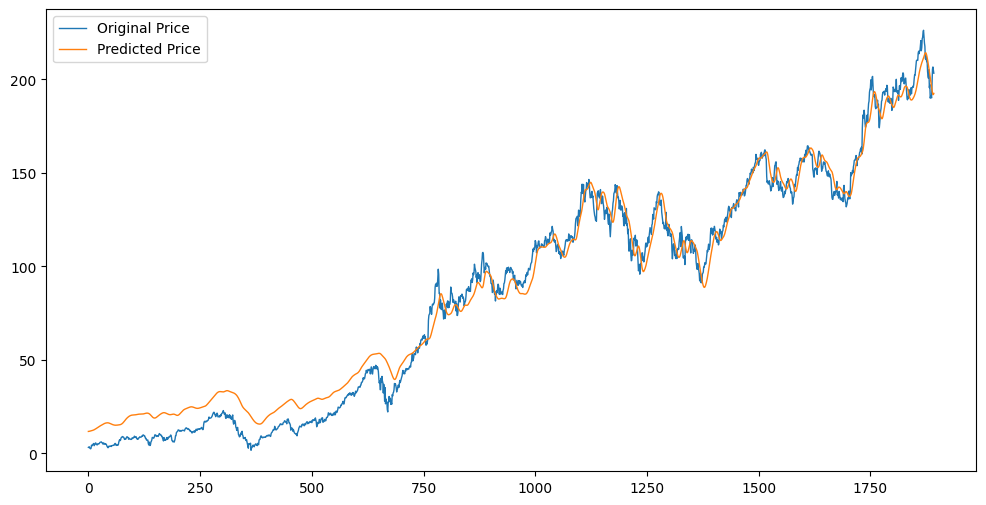

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_pred, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()

In [55]:
model.save("stock_dl_model.keras")